Uma variável aleatória contínua $X$ é dita ter **distribuição normal** se sua função de densidade de probabilidade é dada por:

$$
		f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^{2}}{2\sigma^{2}}\right)
$$

Onde:

*  $\pi$ é a constante matemática ($\pi \approx 3,14159$).
 * $\exp$ é a função exponencial: $\exp(y) = e^y$ ($e \approx 2,71828$).
 * $\mu$ é a média de $X$, denominado parâmetro de localização.
 * $\sigma$ é o desvio-padrão de $X$, denominado parâmetro de forma (ou dispersão).


Outros dois termos associados à distribuição normal são

 * curva do sino (*bell curve*), em razão da semelhança geométrica entre o gráfico da função de
 densidade e um sino.
 * distribuição gaussiana, em homenagem ao matemático e físico alemão [Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss).

Note também que o termo *normal* tem origem histórica e não significa que outras distribuições não sejam normais no sentido usual da palavra.

Algumas propriedades da área abaixo da curva de uma distribuição normal:

* Para uma variável aleatória $X \sim N(\mu, \sigma^{2})$, o gráfico da função de densidade de $X$ é simétrico em relação à média $\mu$ (o que resulta em $\Pr(X>\mu) = \Pr(X<\mu) = \frac{1}{2}$).

* A área sob o gráfico de $f(x)$ é igual a 1, pois f(x) é uma fdp. Esta propriedade vale para quaisquer valores de $\mu$ e de $\sigma$.

* Já a área sob o gráfico de f(x) em um dado intervalo $[a,b]$ representa a probabilidade (essencialmente, a proporção de casos ou freqüência relativa) no intervalo $[a,b]$.

Os exemplos a seguir exibem gráficos de diferentes funções de densidade normal para algumas combinações dos parâmetros $\mu$ e $\sigma$. Para isso iremos utilizar o pacote `norm` da biblioteca [scipy](https://www.scipy.org/).


In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

Para entender a geração dos gráficos abaixo, você deve primeiro entender o funcionamento da função `linspace` do numpy. Veja o exemplo abaixo.

In [2]:
x = np.linspace(-10, 10, 30)
print(x)

[-10.          -9.31034483  -8.62068966  -7.93103448  -7.24137931
  -6.55172414  -5.86206897  -5.17241379  -4.48275862  -3.79310345
  -3.10344828  -2.4137931   -1.72413793  -1.03448276  -0.34482759
   0.34482759   1.03448276   1.72413793   2.4137931    3.10344828
   3.79310345   4.48275862   5.17241379   5.86206897   6.55172414
   7.24137931   7.93103448   8.62068966   9.31034483  10.        ]


In [3]:
x = np.linspace(1, 27, 10)
print(x)

[ 1.          3.88888889  6.77777778  9.66666667 12.55555556 15.44444444
 18.33333333 21.22222222 24.11111111 27.        ]


Você deve também entender a função [norm.pdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

PDF = probability density function.

In [4]:
norm.pdf(0, scale=1, loc=0) # scale = variância, loc = média

0.3989422804014327

In [5]:
norm.pdf(1, scale=1, loc=0) # scale = variância, loc = média

0.24197072451914337

In [6]:
norm.pdf(-1, scale=1, loc=0) # scale = variância, loc = média

0.24197072451914337

In [7]:
norm.pdf(3, scale=1, loc=0) # scale = variância, loc = média

0.0044318484119380075

Agora vamos gerar os gráficos para 4 variáveis aleatórias normais, de mesma média e diferentes variâncias.

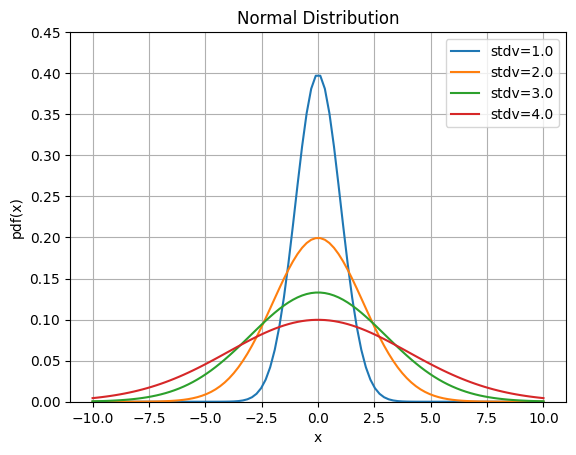

In [8]:
ig, ax = plt.subplots()
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]
for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)

ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

No exemplo acima, note que

- aumentar o valor de $\sigma$ tem o efeito de *achatar* a curva. Isso faz sentido pois, em todos os casos, a área abaixo da curva deve permanecer igual a 1.

- mudar o valor de $\mu$ tem o efeito de transladar a curva para a esquerda ou para a direita, mantendo sua forma.

O próximo exemplo gera gráficos para outras variáveis aleatórias normais, dessa vez com mesma variância e médias diferentes.

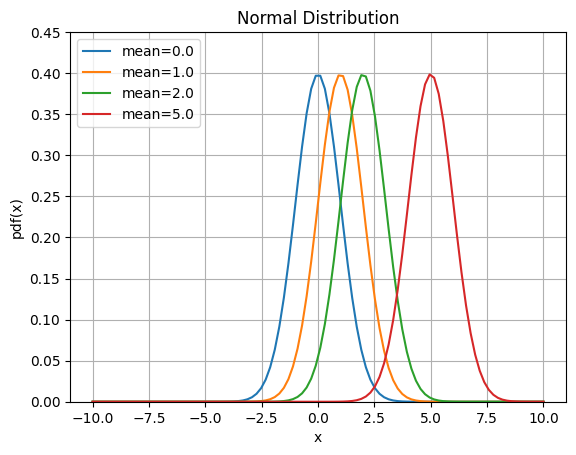

In [9]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
means = [0.0, 1.0, 2.0, 5.0]
for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean=%.1f' % mean)

ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

Outra função que iremos usar bastante é para gerar valores aleatórios de uma variável que segue a distribuição normal. Isso pode feito por meio da função `norm.rvs`.

In [10]:
norm.rvs(scale=5, loc=10, size=3)

array([11.54147213, -3.68322136, 12.39419483])

O exemplo a seguir gera vários valores de uma variável aleatória normal e apresenta esses valores graficamente na forma de um histograma (a função de densidade também é apresentada no mesmo gráfico).

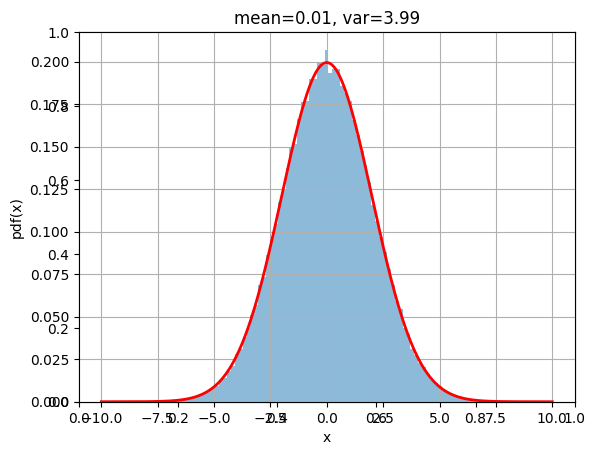

In [11]:
fig, ax = plt.subplots()
xs = norm.rvs(scale=2,loc=0,size=100000)
x = np.linspace(-10,10,10000)
p = norm.pdf(x, scale=2)
v = np.var(xs)
m = np.mean(xs)
ax = fig.add_subplot(111)
ax.hist(xs, bins=100, alpha=0.5, density=True)
ax.plot(x, p, 'r-', lw=2)
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title(f'mean={m:.2f}, var={v:.2f}')
ax.grid(True)

# Função de distribuição acumulada

A função de distribuição acumulada (*cumulative distribution function*) de uma v.a. normal $X$, denotada por $F(X)$, não possui uma forma fechada. De todo modo, podemos usar a função noarm.cdf para computar essa função. Veja o exemplo a seguir.

In [12]:
norm.cdf(2.4, scale=2)

0.8849303297782918

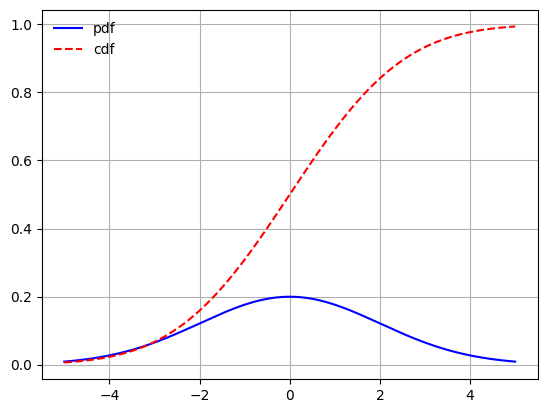

In [13]:
x = np.linspace(-5, 5, 10000)

# vectorization
cdf_values = norm.cdf(x, scale=2)
pdf_values = norm.pdf(x, scale=2)

#plt.plot(x, pdf_values, x, cdf_values)

plt.plot(x, pdf_values, '-b', label='pdf')
plt.plot(x, cdf_values, '--r', label='cdf')

plt.grid(True)

plt.legend(loc='upper left', frameon=False)

plt.show()

# Distribuição normal padrão

Damos o nome de **distribuição normal padrão** (*standard normal distribution*) à distribuição normal com média $\mu = 0$ e desvio-padrão $\sigma = 1$.

As funções de densidade e de distribuição acumulada para este caso são identificadas pelo uso das letras gregas $\phi$ e $\Phi$, respectivamente, no lugar dos usuais $f$ e $F$.

Escrevemos $X \sim N(\mu, \sigma^2)$ para denotar que uma variável aleatória $X$ segue distribuição normal de média $\mu$ e variância $\sigma^2$.

Em particular, se uma variável aleatória $Z$ tem distribuição normal padrão, então usamos $Z \sim N(0, 1)$.

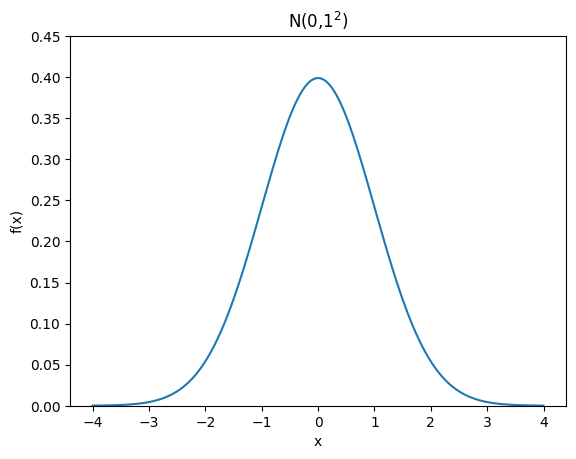

In [14]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45)
plt.show()

# Regra empírica (*empirical rule*)

Os valores apresentados a seguir representam as probabilidades de se encontrar um valor de uma variável aleatória normal $X$ na faixa respectiva.
* 0,6827 ou 68,27\% para a faixa $\mu \pm 1 \times \sigma$
* 0,9545 ou 95,45\% para a faixa $\mu \pm 2 \times \sigma$
* 0,9973 ou 99,73\% para a faixa $\mu \pm 3 \times \sigma$

Se $X \sim N(\mu, \sigma^{2})$, a faixa $\mu \pm 3 \times \sigma$, ocorre a quase totalidade (99,73\%) dos valores. Por esse motivo, o valor $6\sigma$ é denominado *largura da distribuição normal*.

![alt text](https://upload.wikimedia.org/wikipedia/commons/a/a9/Empirical_Rule.PNG)

In [27]:
from scipy.stats import norm
norm.cdf(1) - norm.cdf(-1), norm.cdf(2) - norm.cdf(-2), norm.cdf(3) - norm.cdf(-3)

(0.6826894921370859, 0.9544997361036416, 0.9973002039367398)

# Pacote scipy.stats.norm

O pacote stats.norm da biblioteca SciPy fornece funções para trabalhar com distribuições de probabilidade estatísticas comuns. Essas distribuições descrevem a probabilidade de um evento ocorrer e são usadas em vários campos, como análise de dados, aprendizado de máquina e modelagem estatística.

O pacote norms oferece funcionalidades para:

- Calcular a função de densidade de probabilidade (PDF) de uma distribuição específica. A PDF descreve a probabilidade de um determinado valor ocorrer.
- Calcular a função de distribuição cumulativa (CDF) de uma distribuição. A CDF representa a probabilidade de um valor ser menor ou igual a um determinado valor.
- Gerar números aleatórios a partir de uma distribuição específica. Isso é útil para simular dados ou realizar testes de hipótese.

O pacote norms suporta diversas distribuições de probabilidade, incluindo:

- Normal (Gaussiana)
- Log-normal
- Gamma
- Qui-quadrado
- t de Student
- Weibull



Algumas funções do pacote [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html):

* rvs(loc=0, scale=1, size=1, random_state=None) --> Random variates.

* pdf(x, loc=0, scale=1) --> Probability density function.

* logpdf(x, loc=0, scale=1) --> Log of the probability density function.

* cdf(x, loc=0, scale=1) --> Cumulative distribution function.

* logcdf(x, loc=0, scale=1) --> Log of the cumulative distribution function.

* sf(x, loc=0, scale=1)
 --> Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).

* logsf(x, loc=0, scale=1) --> Log of the survival function.

* ppf(q, loc=0, scale=1) --> Percent point function (inverse of cdf — percentiles).

* isf(q, loc=0, scale=1) --> Inverse survival function (inverse of sf).

* moment(n, loc=0, scale=1) --> Non-central moment of order n

* stats(loc=0, scale=1, moments=’mv’) --> Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’).

* entropy(loc=0, scale=1) --> (Differential) entropy of the RV.

* fit(data, loc=0, scale=1) --> Parameter estimates for generic data.

* expect(func, args=(), loc=0, scale=1, lb=None, ub=None, conditional=False, **kwds) --> Expected value of a function (of one argument) with respect to the distribution.

* median(loc=0, scale=1) --> Median of the distribution.

* mean(loc=0, scale=1) --> Mean of the distribution.

* var(loc=0, scale=1) --> Variance of the distribution.

* std(loc=0, scale=1) --> Standard deviation of the distribution.

* interval(alpha, loc=0, scale=1) --> Endpoints of the range that contains alpha percent of the distribution

No contexto da distribuição normal, as seguintes funções são as mais relevantes:

$$
f(x) \rightarrow \text{norm.pdf}
$$

$$
F(x) = \Pr(X \leq x) \rightarrow \text{norm.cdf}
$$


$$
F^{-1}(x) \rightarrow \text{norm.ppf}
$$


# Exercícios

## Exemplo 1

Seja $Z \sim N(0, 1)$. Calcule

a. $\Pr(Z < -0,86)$

b. $\Pr(Z > 1,26)$

c. $\Pr(Z > -1,37)$

d. $\Pr(-1,25<Z<0,37)$

e. $\Pr(Z<-4,6)$

In [2]:
#E01.a
# Pr(𝑍 < -0,86)

#cdf --> cumulative distribution function
from scipy.stats import norm
x = -.86
cdf_value = norm.cdf(x)
print(cdf_value)

0.1948945212518084


$\Pr(Z> 1.26) = 1 - \Pr(Z \leq 1.26)$

In [16]:
# E01.b
# Pr(𝑍 > 1,26)

from scipy.stats import norm
x = 1.26
cdf_value = 1 - norm.cdf(x)
print(cdf_value)

0.10383468112130045


In [1]:
# E01.c
# Pr(𝑍 > −1,37)

from scipy.stats import norm
x = -1.37
cdf_value = 1 - norm.cdf(x)
print(cdf_value)

0.914656549178033


$Pr(−1.25<𝑍<0.37) = \Pr(Z<0.37) - \Pr(Z<-1.25)$

In [18]:
# E01.d
# Pr(−1,25<𝑍<0,37)

from scipy.stats import norm

cdf_value1 = norm.cdf(-1.25)
cdf_value2 = norm.cdf(.37)

print(cdf_value2 - cdf_value1)

0.5386589811336914


In [19]:
# E01.d
# Pr(𝑍<−4,6)

from scipy.stats import norm
cdf_value1 = norm.cdf(-4.6)
print(cdf_value1)

2.1124547025028537e-06


## Exemplo 2 

Seja $Z \sim N(0, 1)$. Encontre o valor $z$ tal que $\Pr(Z>z) = 0,05$.


Resposta. Esse problema pode ser reformulado para determinar o valor z tal que $\Pr(Z \leq z) = 0.95$. Ou seja, procuramos o valor que delimita $0,95$ da área à esquerda dele. Esse valor pode ser obtido por meio da função `scipy.stats.norm.ppf`, conforme abaixo.

In [3]:
from scipy.stats import norm
z = norm.ppf(0.95)
print(z)

1.6448536269514722


## Exemplo 3

Seja $Z \sim N(0, 1)$. Encontre o valor $z$ tal que $\Pr(-z < Z < z) = 0.99$.

**Resposta.** Por conta da simetria da distribuição normal, se a área da região sombreada na figura for igual a $0.99$, então área total de cada região não sombreada é igual a $(1-0,99)/2=0,005$. Logo o valor de $z$ corresponde a uma probabilidade de 0,995 na tabela. A probabilidade mais próxima é $0.99506$, quando $z \approx 2.58$.

In [5]:
from scipy.stats import norm
z = norm.ppf(0.005)
print(abs(z))

2.575829303548901


## Exemplo 4

Seja $X \sim N(5, 2)$. Calcule $\Pr(X > 0)$.

In [20]:
from scipy.stats import norm
cdf_value1 = 1 - norm.cdf(0, scale=2, loc=5)
print(cdf_value1)

0.9937903346742238


O mesmo resultado acima pode ser obtido ao realizar a transformação para a variável normal padrão. Veja a seguir.

In [21]:
z = (0 - 5)/2
print(z)
cdf_value1 = 1 - norm.cdf(-2.5)
print(cdf_value1)

-2.5
0.9937903346742238


## Exemplo 5 

As alturas dos alunos de determinada escola são normalmente distribuídas com média 1,6m e desvio padrão 0,30m.

1. Encontre a probabilidade de um aluno medir:
	  * entre 1,50m e 1,80m
	  * mais de 1,75m
	  * menos de 1,48m

2. Qual deve ser a altura mínima para 10\% dos mais altos?

In [22]:
norm.cdf(1.8, loc = 1.6, scale = 0.3) - norm.cdf(1.5, loc = 1.6, scale = 0.3)

0.3780661222713136

**Resposta.** Primeiro, note que

$$
		z_1 = \frac{x_1-\mu}{\sigma} = \frac{1,50-1,60}{0,3} = -0,33
$$
e que
$$
		z_2 = \frac{x_2-\mu}{\sigma} = \frac{1,80-1,60}{0,3} = 0,67.
$$
Então
$$
	\begin{align}
		\Pr(x_1 < X < x_2) = \Pr(z_1 < Z < z_2) &= \nonumber \\
		\Pr(-0.33 < Z < 0.67) = \Pr(Z < 0.67) - \Pr(Z < -0,33) &=  \nonumber \\
		0,7486 - 0,3707 &= \nonumber \\
		0,3779 = 37,79\%. \nonumber
	\end{align}
$$

In [23]:
norm.cdf(0.67, loc = 0, scale = 1) - norm.cdf(-.33, loc = 0, scale = 1)

0.3778711238453435

In [24]:
norm.ppf(.9, loc = 1.6, scale = .3)

1.98446546966338

Exercícios (revisão)

In [2]:
pip install scipy

     |████████████████████████████████| 35.0 MB 590 kB/s eta 0:00:01     |███████████████▋                | 17.1 MB 707 kB/s eta 0:00:26     |█████████████████▌              | 19.2 MB 232 kB/s eta 0:01:09
Note: you may need to restart the kernel to use updated packages.


In [3]:
# (a)
from scipy.stats import norm
norm.cdf(-.86)

0.1948945212518084

In [4]:
# (b)
from scipy.stats import norm
1 - norm.cdf(1.26)

0.10383468112130045

In [5]:
# (c)
from scipy.stats import norm
1 - norm.cdf(-1.37)

0.914656549178033

In [6]:
# (d)

from scipy.stats import norm
norm.cdf(.37) - norm.cdf(-1.25)

0.5386589811336914

In [9]:
# (e)

norm.cdf(-4.6)

(2.1124547025028537e-06, 1.014085206548676e-05)

In [11]:
x = .1
norm.cdf(x), norm.pdf(x)

(0.539827837277029, 0.3969525474770118)

In [12]:
norm.ppf(0.5)

0.0